# **Assignment: Naive Bayes**



> Group name : Insurgents_Sales Prediction 



> Group Submission by


1.   Chaitrali Deshmukh(012501489)
2.   Prathyusha Kasibhatta(013774163)
3.   Sandhya Gadgoli(013798759)
4.   Saylee Vyawahare(013801294)

Naive Bayes is a statistical classification technique based on Bayes Theorem. Naive Bayes classifier is the fast, accurate and reliable algorithm which has high accuracy and speed on large datasets.

Naive Bayes classifier assumes that the presence of a feature in a class is unrelated to any other feature. Even if these features depend on each other or upon the existence of the other features, all of these properties independently contribute to the probability and that is why it is known as "Naive."

**Types of Naive Bayes model**
1. Gaussian: It is used in classification and assumes that features follow a normal distribution.
2. Multinomial: It is used for discrete counts.
3. Bernoulli: The binomial model is useful if the feature vectors are binary (i.e. zeros and ones).

We followed below steps to implement Naive Bayes model
1. Loading and Cleaning Data
2. Encoding Features
3. Generating model
4. Evaluate Accuracy

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Loading and Cleaning Data

1. Load the dataset using Pandas.
2. Drop the unnecessary columns
3. Remove the Null values by taking median of rows
4. Remove the missing values.

The processed data is saved to "train_modified.csv" and we have directly loaded the file here.

In [0]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split

In [0]:
#loading the dataset
dataset = pd.read_csv('/content/drive/My Drive/train_modified.csv')
dataset.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Item_Type_15
0,FDP36,10.395000,0.073297,51.4008,OUT018,2009,556.6088,3,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,FDW12,12.792854,0.035400,144.5444,OUT027,1985,4064.0432,5,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,FDC37,12.792854,0.057557,107.6938,OUT019,1985,214.3876,4,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,FDL12,15.850000,0.121633,60.6220,OUT046,1997,2576.6460,8,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,FDL12,15.850000,0.121532,59.2220,OUT013,1987,599.2200,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Encoding Features
1. We have categorized the "Item_Outlet_Sales" values into low and high sales and added it to "Predict_Sales" column.
2. Converted the string values to binary values where "low" equals to 0, and "high" equals to 1.
3. Divided the dataset into features and target variables where features are "Item_MRP", "Item_Fat_Content", "Item_Type", "Outlet_Location_Type" and the target is "Predict_Sales".


In [0]:
#Create a predictSales column and add it to the dataset
dataset['Predict_Sales'] = ""

def predictSales():
  x = []
  for i, saleRecord in enumerate(dataset['Item_Outlet_Sales']):
    if saleRecord < 5000:
      x.append("Low")
    else:
      x.append("High")
  return x

#Categorize sales to Low and High
dataset['Predict_Sales'] = predictSales()
dataset.head(5)

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Item_Type_15,Predict_Sales
0,FDP36,10.395000,0.073297,51.4008,OUT018,2009,556.6088,3,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Low
1,FDW12,12.792854,0.035400,144.5444,OUT027,1985,4064.0432,5,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Low
2,FDC37,12.792854,0.057557,107.6938,OUT019,1985,214.3876,4,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Low
3,FDL12,15.850000,0.121633,60.6220,OUT046,1997,2576.6460,8,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Low
4,FDL12,15.850000,0.121532,59.2220,OUT013,1987,599.2200,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Low


In [0]:
## Formatting Text data

dataset = dataset.replace(['Low', 'High'],[0, 1]) 
dataset.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Item_Type_15,Predict_Sales
0,FDP36,10.395000,0.073297,51.4008,OUT018,2009,556.6088,3,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,FDW12,12.792854,0.035400,144.5444,OUT027,1985,4064.0432,5,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,FDC37,12.792854,0.057557,107.6938,OUT019,1985,214.3876,4,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,FDL12,15.850000,0.121633,60.6220,OUT046,1997,2576.6460,8,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,FDL12,15.850000,0.121532,59.2220,OUT013,1987,599.2200,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#split dataset in features and target variable
feature_cols = ['Item_MRP',	'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Type_0',	'Item_Type_1',	'Item_Type_2', 'Outlet_Location_Type_0',	'Outlet_Location_Type_1', 'Outlet_Location_Type_2' , 'Outlet_Size_0', 'Outlet_Size_1']

In [0]:
# Features
X = dataset[feature_cols] 

#S = dataset.Item_Outlet_Sales

S = dataset.Predict_Sales

# Target variable
y = S


## Generating Model

We have used guassian naive bayes classifier which assumes that data from each label is drawn from a simple Gaussian distribution with no covariance between dimensions. This model can be fit by simply finding the mean and standard deviation of the points within each label.

We have divided 70% of dataset into training data and 30% into test data and performed following operations:

1. Create naive bayes classifier
2. Fit the dataset on classifier
3. Perform prediction

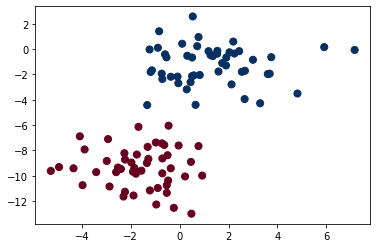

In [0]:
from sklearn.datasets import make_blobs
A, b = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(A[:, 0], A[:, 1], c=b, s=50, cmap='RdBu');

In [0]:
# Split dataset into training set and test set

# 70% into training set and 30% into testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=71)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [0]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


## Accuracy and Statistics
1. We have generated accuracy score to know how often is the classifier correct? Our model predicted output with 91.2% accuracy.
2. We have created a classification report that contains the various statistics required to judge the model.
3. We have created a confusion matrix which gave us clear idea of the accuracy and the fitting of the model.

In [0]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 91.2006257332812


In [0]:

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2364
           1       0.32      0.15      0.20       193

    accuracy                           0.91      2557
   macro avg       0.63      0.56      0.58      2557
weighted avg       0.89      0.91      0.90      2557



In [0]:
print(metrics.confusion_matrix(y_test, y_pred))

[[2304   60]
 [ 165   28]]


##Conclusion
In this assignment, we have used the cleaned version of dataframe and made some changes in feature selection by adding some new feature columns to analyze the data behavior. Also, for using Naive Bayes we have converted the outlet_sales column entries into low and High (1,0) values; this improved the accuracy.